# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext pycodestyle_magic
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

<b>Задача 1.</b> Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Решение***
<p>Для задачи линейной регрессии с L2 регуляризацией нужно минимизировать функционал:</p>
$$Q(w) = \frac{1}{N}\sum_{i = 1}^{N}(<x_i, w> - y_i)^2 + \frac{1}{C}\|w\|^2$$
В случае мини-батч градиентного спуска требуется найти градиент от
$$Q(w) = \frac{1}{n}\sum_{i = 1}^{n}(<x_{j_i}, w> - y_i)^2 + \frac{1}{C}\|w\|^2,$$
где $\{j_1, \cdots, j_n\}~-$ случайно выбранные объекты (выбираются на каждой итерации), $1 < n < N$.
<p>Т.о.</p>
$$w_{k+1} = w_{k} - \alpha_k \left(\frac{2}{n}\sum_{i = 1}^{n}(<x_{j_i}, w_k> - y_i)x_{j_i} + \frac{2}{C}w_k\right),$$
где $\alpha_k~-$ длина шага на k-ой итерации.

Градиент является направлением наискорейшего роста функции $Q(w)$, а антиградиент - наискорейшего убывания.

<b>Задача 2.</b> Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Решение***
Пусть $y_i \in \{0, 1\}, i = 1,\ldots, n~-$ индексы случайно выбранных объектов, $a_i = \sigma(<x_i, w>)$, тогда 

$$L(w |X, y) = - \frac{1}{n}\left[\sum_{i = 1}^{n} y_i \log \sigma(<x_i, w>) + ( 1 - y_i) \log (1 - \sigma(<x_i, w>)) \right] +  \frac{1}{C}\|w\|^2 = $$
$$=- \frac{1}{n}\left[\sum_{i = 1}^{n} y_i \log \sigma(<x_i, w>) + ( 1 - y_i) \log (\sigma(-<x_i, w>)) \right] +  \frac{1}{C}\|w\|^2.$$

Учитывая, что $\sigma(<x,w>) + \sigma(-<x,w>) = 1$ и $\sigma'(z) = \sigma(z)\sigma(-z)$, найдем градиент функции $L(w |X, y)$:
$$\nabla_w L(w |X, y) = - \frac{1}{n}\left[\sum_{i = 1}^{n} y_i x_i \sigma(-<x_i, w>) - ( 1 - y_i) x_i \sigma(<x_i, w>) \right] +  \frac{2}{C}w=$$
$$=- \frac{1}{n}\left[\sum_{i = 1}^{n} x_i\left(y_i\left(\sigma(-<x_i, w>)+ \sigma(<x_i, w>)\right) - \sigma(<x_i, w>)\right) \right] +  \frac{2}{C}w=$$
$$=- \frac{1}{n}\left[\sum_{i = 1}^{n} x_i\left(y_i - \sigma(<x_i, w>)\right) \right] +  \frac{2}{C}w.$$
<p>Т.о.</p>
$$w_{k+1} = w_{k} - \alpha_k \left(\frac{1}{n}\left[\sum_{i = 1}^{n} x_i\left(\sigma(<x_i, w_k>) - y_i\right) \right] +  \frac{2}{C}w_k\right),$$

где $\alpha_k~-$ длина шага на k-ой итерации.

Градиент является направлением наискорейшего роста функции $Q(w)$, а антиградиент - наискорейшего убывания.

<b>Задача 3.</b> Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Решение***
<ol>
    <li><p> Чтобы показать, что точное решение линейной регрессии $w = (X^TX)^{-1}X^TY$ является точкой минимума, воспользуемся достаточным условием экстремума в терминах частных производных. Для того, чтобы $f: U(x_0) \rightarrow \mathbb{R}$, дважды дифференцируемая по всем аргументам в точке $x_{0}=(x_{0}^{1},...,x_{0}^{m}) \in \mathbb{R}^{m}$, в ней имела локальный минимум достаточно, чтобы её Гессиан был положителен.</p>
        <p>$$L(w) = \frac{1}{N}\|Xw - Y\|^2$$ </p>
        <p>$$\frac{dL(w)}{dw} = \frac{2}{N}\left(X^TXw - X^TY\right)$$ </p>
        <p>$$\frac{d^{2}L(w)}{dw^{2}} = X^TX$$ </p>
        <p>В нашем случае нужно показать, что $X^TX~-$ положительно определенная матрица.</p>
        <p>Действительно, для $\forall z \in \mathbb{R}^{m}, z \neq \{\bf{0}\}$ $$\langle X^TXz, y \rangle = \langle Xz, Xz \rangle = \|Xz\|^{2} > 0$$</p>
        <p>Следовательно, $w = (X^TX)^{-1}X^TY ~-$ точкой минимума.</p>
    </li>
    <li>Задача с $L_2$ регуляризацией: $$L(w) = \frac{1}{N}\|Xw - Y\|^2 + \frac{1}{C}\|w\|^2 \rightarrow \min_w$$
        <p>$$\frac{\partial L(w)}{\partial w} = \frac{2}{N}\left(X^TXw - X^TY\right) + \frac{2}{C}w = 0$$</p>
        $$ w = \left(X^TX + \frac{N}{C}I\right)^{-1}X^TY$$
        <p>Если матрица X имеет линейно зависимые признаки, то оптимизационная задача может иметь бесконечное число решений, большинство из которых является переобученными. То есть для любого объекта $x$ существует такой вектор $v \neq <b>0</b>: <x, v> = 0$. Пусть $w~-$ оптимальный вектор весов, но тогда $w + \alpha v $ тоже оптимальный. Следовательно, метод оптимизации может найти очень большие веса, а это значит, что классификатор переобучится (будет очень чувствителен к маленьким изменениям признаков). А в задаче регуляризации веса с большой нормой штрафуются, поэтому проблема переобучения в этом случае отпадает.</p>
    </li>
</ol>

<b>Задача 4.</b>  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Решение***

$$ \dfrac{d E(L | x_i)}{da(x_i)} = 0 $$

$$ \frac {dE(L | x_i)}{da(x_i)} = - \frac{p(y_i = 1| x_i)}{a(x_i)}  + \frac{p(y_i = 0|x_i)}{1 - a(x_i)} = 0 $$

$$-p(y_i = 1| x_i)(1 - a(x_i)) + (1 - p(y_i = 1| x_i))a(x_i) = 0$$

$$  a(x_i) = p(y_i = 1 | x_i)$$

<b>Задача 5.</b>  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Решение***

В задаче L1/L2 регуляризации не нужно использовать свободный член. Если мы будем штрафовать за его величину, то мы будем учитывать представления о близости к нулю нашей целевой переменной и отсутствии для нее смещения, что является странным.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [13]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    size = X.shape[0]
    ind = np.arange(0, size)
    if shuffle:
        np.random.shuffle(ind)
    for i in range(0, size, batch_size):
        indx = ind[i : min(i + batch_size, size)]
        X_batch = X[indx]
        y_batch = y[indx][:, np.newaxis]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = X_batch.shape[0]
        if self.model_type == 'lin_reg':
            loss = 1/n * np.linalg.norm(X_batch@self.weights - y_batch, ord=2)**2
            loss += 1/ self.C * np.linalg.norm(self.weights[1:])**2
        if self.model_type == 'log_reg':
            sgm = sigmoid(X_batch@self.weights)
            loss = -1/n * np.sum(y_batch * np.log(sgm) + (1 - y_batch) * np.log(1 - sgm))
            loss += 1/ self.C * np.linalg.norm(self.weights[1:])**2
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = X_batch.shape[0]
        l = np.array([[0] + [2] * (X_batch.shape[1] - 1)]).T
        if self.model_type == 'lin_reg':
            loss_grad = 2/n * X_batch.T @(X_batch@self.weights - y_batch) + l * self.weights/self.C
        if self.model_type == 'log_reg':
            sgm =sigmoid(X_batch@self.weights)
            loss_grad = 1/n * X_batch.T @ (sgm - y_batch)  + l * self.weights/self.C
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        XX = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
        self.weights = np.random.uniform(0, 1, (XX.shape[1], 1))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(XX,y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
        if self.model_type == 'lin_reg':
            y_hat = (X @ self.weights > 0).astype(int)
        if self.model_type == 'log_reg':
            y_hat = (sigmoid(X @ self.weights) > 0.5).astype(int)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat
    
    def predict_t(self, X, t):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
        if self.model_type == 'lin_reg':
            y_hat = (X @ self.weights > t).astype(int)
        if self.model_type == 'log_reg':
            y_hat = (sigmoid(X @ self.weights) > t).astype(int)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [25]:
def plot_decision_boundary(clf, X, lbl=None):
    wts = clf.weights
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x = np.arange(x_min, x_max)
    plt.plot(x, -(wts[1] * x + wts[0]) / wts[2], label='{}'.format(lbl))

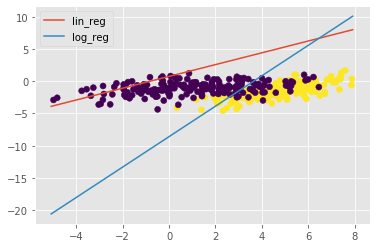

In [26]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
clf1 = MySGDClassifier(batch_generator, model_type='lin_reg')
clf1.fit(X, y)
plot_decision_boundary(clf1, X, lbl='lin_reg')
clf2 = MySGDClassifier(batch_generator, model_type='log_reg')
clf2.fit(X, y)
plot_decision_boundary(clf2, X, lbl='log_reg')
plt.scatter(X[:,0], X[:,1], c=y)
plt.legend ()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [27]:
from sklearn.datasets import make_classification

In [28]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

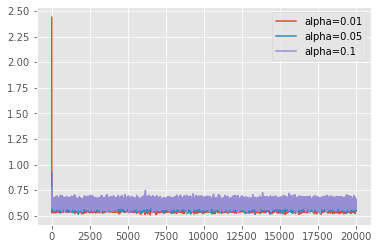

In [35]:
alpha = [0.01, 0.05, 0.1]
N = 50
fig = plt.figure()
for  a in alpha:
    loss = []
    clf1 = MySGDClassifier(batch_generator, model_type='log_reg', alpha=a)
    clf1.fit(X, y)
    i = 0
    loss = list([np.mean(clf1.errors_log['loss'][i * N : (i + 1) * N]) for i in range(len(clf1.errors_log['loss'])//N)])
    plt.plot(np.arange(len(loss)), loss, label='alpha={}'.format(a))
    loss.clear()
plt.legend()
     

        
        

C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in matmul
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in subtract
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in matmul
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in multiply
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in matmul
C:\Users\Asia\Anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out,

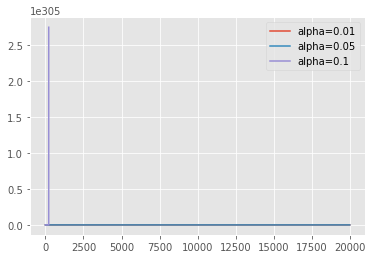

In [29]:
alpha = [0.01, 0.05, 0.1]
N = 50
fig = plt.figure()
for  a in alpha:
    loss = []
    clf1 = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=a)
    clf1.fit(X, y)
    i = 0
    loss = list([np.mean(clf1.errors_log['loss'][i * N : (i + 1) * N]) for i in range(len(clf1.errors_log['loss']) // N)])
    plt.plot(np.arange(len(loss)), loss, label='alpha={}'.format(a))
    loss.clear()
plt.legend()
     
     

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

При больших $\alpha$ метод градиентного спуска не сходится (средние значения функции потерь меняются).

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in true_divide
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in matmul
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in matmul


Text(0.5, 1.0, 'Средние веса для линейной регрессии')

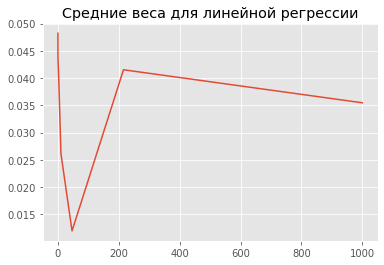

In [44]:
a = 0.01
my_weights = []
for c in np.logspace(3, -3, 10):
    
    clf1 = MySGDClassifier(batch_generator, C=c, model_type='lin_reg', alpha=a)
    clf1.fit(X, y)
    my_weights.append(clf1.weights.mean())
    
plt.plot(np.logspace(3, -3, 10), my_weights)
plt.title("Средние веса для линейной регрессии")  

C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in true_divide
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in matmul
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in matmul


Text(0.5, 1.0, 'Средние веса для логистической регрессии')

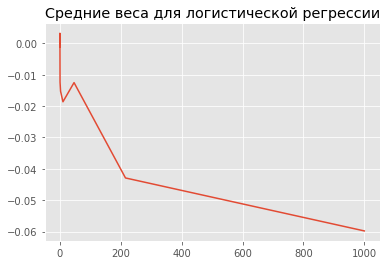

In [45]:
a = 0.01
my_weights = []
for c in np.logspace(3, -3, 10):
    
    clf1 = MySGDClassifier(batch_generator, C=c, model_type='log_reg', alpha=a)
    clf1.fit(X, y)
    my_weights.append(clf1.weights.mean())
    
plt.plot(np.logspace(3, -3, 10), my_weights)
plt.title("Средние веса для логистической регрессии") 

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [41]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


In [42]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [43]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

In [44]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))
X_test = []
pair_ids=set()
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title_j, pair_id) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_id = docs[j]
            pair_ids.add(pair_id)
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
pair_ids=np.array(list(pair_ids))
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

In [45]:
_, num = np.unique(np.array(groups_train), return_counts=True)

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [46]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
x_train = StandardScaler().fit_transform(X_train)

In [48]:
j = 0;
for i in range(len(num)):
    
    x1, x2, y1, y2=train_test_split(x_train[j : j + num[i], :], y_train[j : j + num[i]], test_size=0.3, shuffle=False)
    if i == 0:
        x_train1 = x1
        y_train1 = y1
        x_test1 = x2
        y_test1 = y2
    else:
        x_train1 = np.concatenate((x_train1, x1), axis=0)
        y_train1 = np.concatenate((y_train1, y1), axis=0)
        x_test1 = np.concatenate((x_test1, x2), axis=0)
        y_test1 = np.concatenate((y_test1, y2), axis=0)
    j += num[i]

x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape

((8125, 15), (8125,), (3565, 15), (3565,))

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [26]:
al=[0.00001, 0.0001, 0.01, 0.05]
Cs=[1, 50, 100, 500, 1000, 5000]
epoch=[5, 15, 20]
batchs=[1, 50, 100, 500, 1000]
features = []
for a in al:
    for cs in Cs:
        for ep in epoch:
            for batch in batchs:
                myclf = MySGDClassifier(batch_generator, alpha=a, C=cs,max_epoch=ep, model_type='log_reg', batch_size=batch)
                myclf.fit(x_train1, y_train1)
                features.append((f1_score(y_test1, myclf.predict(x_test1)), a, cs, ep, batch))
                print("f1_score",f1_score(y_test1, myclf.predict(x_test1)), a, cs, ep, batch)

C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply


f1_score 0.6259858862598588 1e-05 1 5 1
f1_score 0.629147417051659 1e-05 1 5 50
f1_score 0.6097738876732312 1e-05 1 5 100
f1_score 0.6149752945648044 1e-05 1 5 500
f1_score 0.6223832528180355 1e-05 1 5 1000
f1_score 0.6329225352112675 1e-05 1 15 1
f1_score 0.5036880927291887 1e-05 1 15 50
f1_score 0.5067873303167421 1e-05 1 15 100
f1_score 0.6245443499392466 1e-05 1 15 500
f1_score 0.6084751901484968 1e-05 1 15 1000
f1_score 0.6106463878326996 1e-05 1 20 1
f1_score 0.5977011494252874 1e-05 1 20 50
f1_score 0.6250516742455561 1e-05 1 20 100
f1_score 0.5927197802197802 1e-05 1 20 500
f1_score 0.6147783251231528 1e-05 1 20 1000
f1_score 0.6274343776460627 1e-05 50 5 1
f1_score 0.6302521008403361 1e-05 50 5 50
f1_score 0.6257521058965101 1e-05 50 5 100
f1_score 0.6180257510729613 1e-05 50 5 500
f1_score 0.6220133176654916 1e-05 50 5 1000
f1_score 0.6211031175059952 1e-05 50 15 1
f1_score 0.6215678471945882 1e-05 50 15 50
f1_score 0.620716211012707 1e-05 50 15 100
f1_score 0.624390243902439

f1_score 0.46206425153793584 0.01 1 15 50
f1_score 0.013618677042801557 0.01 1 15 100
f1_score 0.4182726623840114 0.01 1 15 500
f1_score 0.4106245513280689 0.01 1 15 1000
f1_score 0.34146341463414637 0.01 1 20 1
f1_score 0.23185988323603002 0.01 1 20 50
f1_score 0.4638472032742156 0.01 1 20 100
f1_score 0.14642857142857144 0.01 1 20 500
f1_score 0.011684518013631937 0.01 1 20 1000
f1_score 0.5388349514563108 0.01 50 5 1
f1_score 0.5401812688821752 0.01 50 5 50
f1_score 0.5354523227383864 0.01 50 5 100
f1_score 0.19393939393939394 0.01 50 5 500
f1_score 0.5269683818970862 0.01 50 5 1000
f1_score 0.5707656612529002 0.01 50 15 1
f1_score 0.5353846153846155 0.01 50 15 50
f1_score 0.4593301435406698 0.01 50 15 100
f1_score 0.49246889325474785 0.01 50 15 500
f1_score 0.5720823798627002 0.01 50 15 1000
f1_score 0.4813333333333334 0.01 50 20 1
f1_score 0.5323475046210722 0.01 50 20 50
f1_score 0.5067524115755627 0.01 50 20 100
f1_score 0.5160883280757098 0.01 50 20 500
f1_score 0.5534967124925

C:\Users\Asia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score 0.0 0.05 1 5 1000
f1_score 0.5105837075048107 0.05 1 15 1
f1_score 0.521356783919598 0.05 1 15 50
f1_score 0.3805309734513274 0.05 1 15 100
f1_score 0.5130823229100192 0.05 1 15 500
f1_score 0.5374771480804388 0.05 1 15 1000
f1_score 0.25328947368421056 0.05 1 20 1
f1_score 0.5205992509363296 0.05 1 20 50
f1_score 0.49113591595535133 0.05 1 20 100
f1_score 0.5216300940438872 0.05 1 20 500
f1_score 0.5006468305304009 0.05 1 20 1000
f1_score 0.5935973955507325 0.05 50 5 1
f1_score 0.5939726027397261 0.05 50 5 50
f1_score 0.5875706214689266 0.05 50 5 100
f1_score 0.5896589658965896 0.05 50 5 500
f1_score 0.5025839793281653 0.05 50 5 1000
f1_score 0.5593914569923932 0.05 50 15 1
f1_score 0.5959978366684695 0.05 50 15 50
f1_score 0.15972222222222224 0.05 50 15 100
f1_score 0.5955176093916755 0.05 50 15 500
f1_score 0.578177727784027 0.05 50 15 1000
f1_score 0.0 0.05 50 20 1
f1_score 0.6095820591233435 0.05 50 20 50
f1_score 0.5911062906724511 0.05 50 20 100
f1_score 0.4977139124755

In [27]:
al=[0.00001, 0.0001, 0.01, 0.05]
Cs=[1, 50, 100, 500, 1000, 5000]
epoch=[5, 15, 20]
batchs=[1, 50, 100, 500, 1000]
features_lin = []
for a in al:
    for cs in Cs:
        for ep in epoch:
            for batch in batchs:
                myclf = MySGDClassifier(batch_generator, alpha=a, C=cs, max_epoch=ep, model_type='lin_reg', batch_size=batch)
                myclf.fit(x_train1, y_train1)
                features_lin.append((f1_score(y_test1, myclf.predict(x_test1)), a, cs, ep, batch))
                print("f1_score",f1_score(y_test1, myclf.predict(x_test1)), a, cs, ep, batch)

f1_score 0.44356782818321283 1e-05 1 5 1
f1_score 0.4441518542901032 1e-05 1 5 50
f1_score 0.44637294170004455 1e-05 1 5 100
f1_score 0.4451797926318111 1e-05 1 5 500
f1_score 0.4840344652812975 1e-05 1 5 1000
f1_score 0.4435712726478935 1e-05 1 15 1
f1_score 0.4435712726478935 1e-05 1 15 50
f1_score 0.4435712726478935 1e-05 1 15 100
f1_score 0.4435712726478935 1e-05 1 15 500
f1_score 0.4435712726478935 1e-05 1 15 1000
f1_score 0.4435712726478935 1e-05 1 20 1
f1_score 0.4435712726478935 1e-05 1 20 50
f1_score 0.4435712726478935 1e-05 1 20 100
f1_score 0.4435712726478935 1e-05 1 20 500
f1_score 0.4435712726478935 1e-05 1 20 1000
f1_score 0.4419114423498466 1e-05 50 5 1
f1_score 0.44069322529822186 1e-05 50 5 50
f1_score 0.44400352733686066 1e-05 50 5 100
f1_score 0.4457355333488263 1e-05 50 5 500
f1_score 0.4404332129963898 1e-05 50 5 1000
f1_score 0.44417767106842737 1e-05 50 15 1
f1_score 0.4462736373748609 1e-05 50 15 50
f1_score 0.448284023668639 1e-05 50 15 100
f1_score 0.448292220

f1_score 0.5073588439925074 0.01 1 5 500
f1_score 0.4944105691056911 0.01 1 5 1000
f1_score 0.5097932535364527 0.01 1 15 1
f1_score 0.4953105196451204 0.01 1 15 50
f1_score 0.4996129032258064 0.01 1 15 100
f1_score 0.5043432482232166 0.01 1 15 500
f1_score 0.4435712726478935 0.01 1 15 1000
f1_score 0.4962944032711474 0.01 1 20 1
f1_score 0.4435712726478935 0.01 1 20 50
f1_score 0.5114879649890591 0.01 1 20 100
f1_score 0.4435712726478935 0.01 1 20 500
f1_score 0.4435712726478935 0.01 1 20 1000
f1_score 0.4984567901234568 0.01 50 5 1
f1_score 0.4942849885699771 0.01 50 5 50
f1_score 0.505795574288725 0.01 50 5 100
f1_score 0.4786979415988511 0.01 50 5 500
f1_score 0.45596558750283 0.01 50 5 1000
f1_score 0.49781659388646277 0.01 50 15 1
f1_score 0.4949341438703141 0.01 50 15 50
f1_score 0.5123072761698674 0.01 50 15 100
f1_score 0.5061530230069556 0.01 50 15 500
f1_score 0.5113233287858118 0.01 50 15 1000
f1_score 0.4366197183098592 0.01 50 20 1
f1_score 0.4437636761487966 0.01 50 20 50

C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in matmul
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in subtract
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in multiply
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in greater


f1_score 0.0 0.05 50 5 1


C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in matmul
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in matmul


f1_score 0.0 0.05 50 5 50
f1_score 0.0 0.05 50 5 100
f1_score 0.0 0.05 50 5 500
f1_score 0.0 0.05 50 5 1000
f1_score 0.0 0.05 50 15 1
f1_score 0.0 0.05 50 15 50
f1_score 0.0 0.05 50 15 100
f1_score 0.0 0.05 50 15 500
f1_score 0.0 0.05 50 15 1000
f1_score 0.0 0.05 50 20 1
f1_score 0.0 0.05 50 20 50


C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in add


f1_score 0.0 0.05 50 20 100
f1_score 0.0 0.05 50 20 500
f1_score 0.0 0.05 50 20 1000
f1_score 0.0 0.05 100 5 1
f1_score 0.0 0.05 100 5 50
f1_score 0.0 0.05 100 5 100
f1_score 0.0 0.05 100 5 500
f1_score 0.0 0.05 100 5 1000
f1_score 0.0 0.05 100 15 1
f1_score 0.0 0.05 100 15 50
f1_score 0.0 0.05 100 15 100
f1_score 0.0 0.05 100 15 500
f1_score 0.0 0.05 100 15 1000
f1_score 0.0 0.05 100 20 1
f1_score 0.0 0.05 100 20 50
f1_score 0.0 0.05 100 20 100
f1_score 0.0 0.05 100 20 500
f1_score 0.0 0.05 100 20 1000
f1_score 0.0 0.05 500 5 1
f1_score 0.0 0.05 500 5 50
f1_score 0.0 0.05 500 5 100
f1_score 0.0 0.05 500 5 500
f1_score 0.0 0.05 500 5 1000
f1_score 0.0 0.05 500 15 1
f1_score 0.0 0.05 500 15 50


C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in matmul


f1_score 0.0 0.05 500 15 100
f1_score 0.0 0.05 500 15 500
f1_score 0.0 0.05 500 15 1000
f1_score 0.0 0.05 500 20 1
f1_score 0.0 0.05 500 20 50
f1_score 0.0 0.05 500 20 100
f1_score 0.0 0.05 500 20 500
f1_score 0.0 0.05 500 20 1000
f1_score 0.0 0.05 1000 5 1
f1_score 0.0 0.05 1000 5 50
f1_score 0.0 0.05 1000 5 100
f1_score 0.0 0.05 1000 5 500
f1_score 0.0 0.05 1000 5 1000
f1_score 0.0 0.05 1000 15 1
f1_score 0.0 0.05 1000 15 50
f1_score 0.0 0.05 1000 15 100
f1_score 0.0 0.05 1000 15 500
f1_score 0.0 0.05 1000 15 1000
f1_score 0.0 0.05 1000 20 1
f1_score 0.0 0.05 1000 20 50
f1_score 0.0 0.05 1000 20 100
f1_score 0.0 0.05 1000 20 500
f1_score 0.0 0.05 1000 20 1000
f1_score 0.0 0.05 5000 5 1
f1_score 0.0 0.05 5000 5 50
f1_score 0.0 0.05 5000 5 100
f1_score 0.0 0.05 5000 5 500
f1_score 0.0 0.05 5000 5 1000
f1_score 0.0 0.05 5000 15 1
f1_score 0.0 0.05 5000 15 50
f1_score 0.0 0.05 5000 15 100
f1_score 0.0 0.05 5000 15 500
f1_score 0.0 0.05 5000 15 1000
f1_score 0.0 0.05 5000 20 1
f1_score 0.

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

Кросс-валидацией по f1-score (но в kaggle что-то хуже сработало, выбрав, лучшее значение \approx 0.6)

In [28]:
from sklearn.model_selection import KFold

In [110]:
kf = KFold(n_splits=3, random_state=None, shuffle=False)
t = np.linspace(0.45, 0.6, 20)
X = x_train
y = y_train
f1score = []
for tt in t:
    print(tt)
    f1 = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_tr, y_test = y[train_index], y[test_index]
        myclf = MySGDClassifier(batch_generator, alpha=0.0001, C=5000, max_epoch=5, model_type='log_reg', batch_size=500)
        myclf.fit(X_train, y_tr)
        f1 += f1_score(y_test, myclf.predict_t(X_test, tt))
    print(f1/3)
    f1score.append(f1/3)
    

0.45


C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply


0.6079703979848047
0.4578947368421053
0.6046599386827997
0.46578947368421053
0.6099099609011158
0.4736842105263158
0.6074230722913143
0.48157894736842105
0.6131901498546642
0.48947368421052634
0.609574365813482
0.49736842105263157
0.6065837681999252
0.5052631578947369
0.6121409548453786
0.5131578947368421
0.6073204176156314
0.5210526315789473
0.6168278500829347
0.5289473684210526
0.6106781617370199
0.5368421052631579
0.6101719023448584
0.5447368421052632
0.6108656231068698
0.5526315789473684
0.6152721287053081
0.5605263157894737
0.6104230447843255
0.5684210526315789
0.6089124300872069
0.5763157894736842
0.6135363829213049
0.5842105263157895
0.6149679209668246
0.5921052631578947
0.6122943797478071
0.6
0.615003731149415


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

In [49]:
x_test = StandardScaler().fit_transform(X_test)
x_train = StandardScaler().fit_transform(X_train)
print(x_test.shape, x_train.shape)

In [51]:
file = open("out1.csv", "w")
file.write(str("pair_id,target\n"))
myclf = MySGDClassifier(batch_generator, alpha=0.0001, C=100, max_epoch=5, model_type='log_reg', batch_size=1000)
myclf.fit(x_train1, y_train1)
res = myclf.predict(x_test).flatten()
for k, pair_id in enumerate(pair_ids):
    file.write(str(pair_id) + "," + str(res[k]) + str("\n"))
file.close()

C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
C:\Users\Asia\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply


# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

Не совсем поняла, как лучше строить валидационную выборку (на моей, кажется, переобучилось все).

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***